In [141]:
import warnings
warnings.filterwarnings("ignore")

import os
import datetime
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import preprocessing as preprocess

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
plt.rcParams['axes.unicode_minus'] = False
# plt.figure(figsize=(10, 5))

# font_path = 'C:\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf' #한글 폰트 경로 
font_path = 'C:\\Windows\\Fonts\\malgun.ttf' #한글 폰트 경로 

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [142]:
""""Directory
bigcon 
  |- data
       |- 01_제공데이터
       |- 02_평가데이터
"""
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, 'data')
source_dir = os.path.join(cur_dir, 'source')
data_train_dir = os.path.join(data_dir, '01_제공데이터')
data_test_dir = os.path.join(data_dir, '02_평가데이터')


""" Parameters
"""
headline = '2020 빅콘테스트 데이터분석분야-챔피언리그'
train_target = '2019년 실적데이터'
test_target = '2020년 6월 판매실적예측데이터(평가데이터)'
rate_target = '시청률 데이터'


""" Load Data
"""
dfs = preprocess.ProcessSale(
    data_dir = data_dir,
    source_dir = source_dir,
    data_train_dir = data_train_dir,
    data_test_dir = data_test_dir,
    headline = headline,
    train_target = train_target,
    rate_target = rate_target,
    test_target = test_target,
)

df_train = dfs.train_preprocess()
df_test = dfs.test_preprocess()
df_rate = dfs.rate_preprocess()

Train : file already exist!
Test : file already exist!
train data : 38309
test data : 2891


In [143]:
print(df_train.shape)
print(df_test.shape)

(37372, 25)
(2716, 25)


In [144]:
df_train.columns

Index(['datetime', 'year', 'month', 'day', 'hour', 'minute', 'weekday',
       'holiday', 'exposure(min)', 'mother_cd', 'product_cd', 'product_name',
       'product_grp', 'temp', 'rainfall', 'wind_speed', 'wind_direction',
       'humidity', 'pressure', 'spot_pressure', 'sea_level_pressure',
       'snowfall', 'unit_price', 'sell_price', 'sales_cnt'],
      dtype='object')

In [145]:
df_train.head()

,datetime,year,month,day,hour,minute,weekday,holiday,exposure(min),mother_cd,product_cd,product_name,product_grp,temp,rainfall,wind_speed,wind_direction,humidity,pressure,spot_pressure,sea_level_pressure,snowfall,unit_price,sell_price,sales_cnt
0,2019-01-01 06:00:00,2019,1,1,6,0,Tuesday,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,2099000.0,52.606516
1,2019-01-01 06:00:00,2019,1,1,6,0,Tuesday,1,NaN,100346,201079,테이트 여성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,4371000.0,109.548872
2,2019-01-01 06:20:00,2019,1,1,6,20,Tuesday,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,3262000.0,81.754386
3,2019-01-01 06:20:00,2019,1,1,6,20,Tuesday,1,NaN,100346,201079,테이트 여성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,6955000.0,174.310777
4,2019-01-01 06:40:00,2019,1,1,6,40,Tuesday,1,20.0,100346,201072,테이트 남성 셀린니트3종,의류,-7.9,0.0,1.3,290.0,60.0,2.0,1023.6,1034.9,0.0,39900.0,6672000.0,167.218045


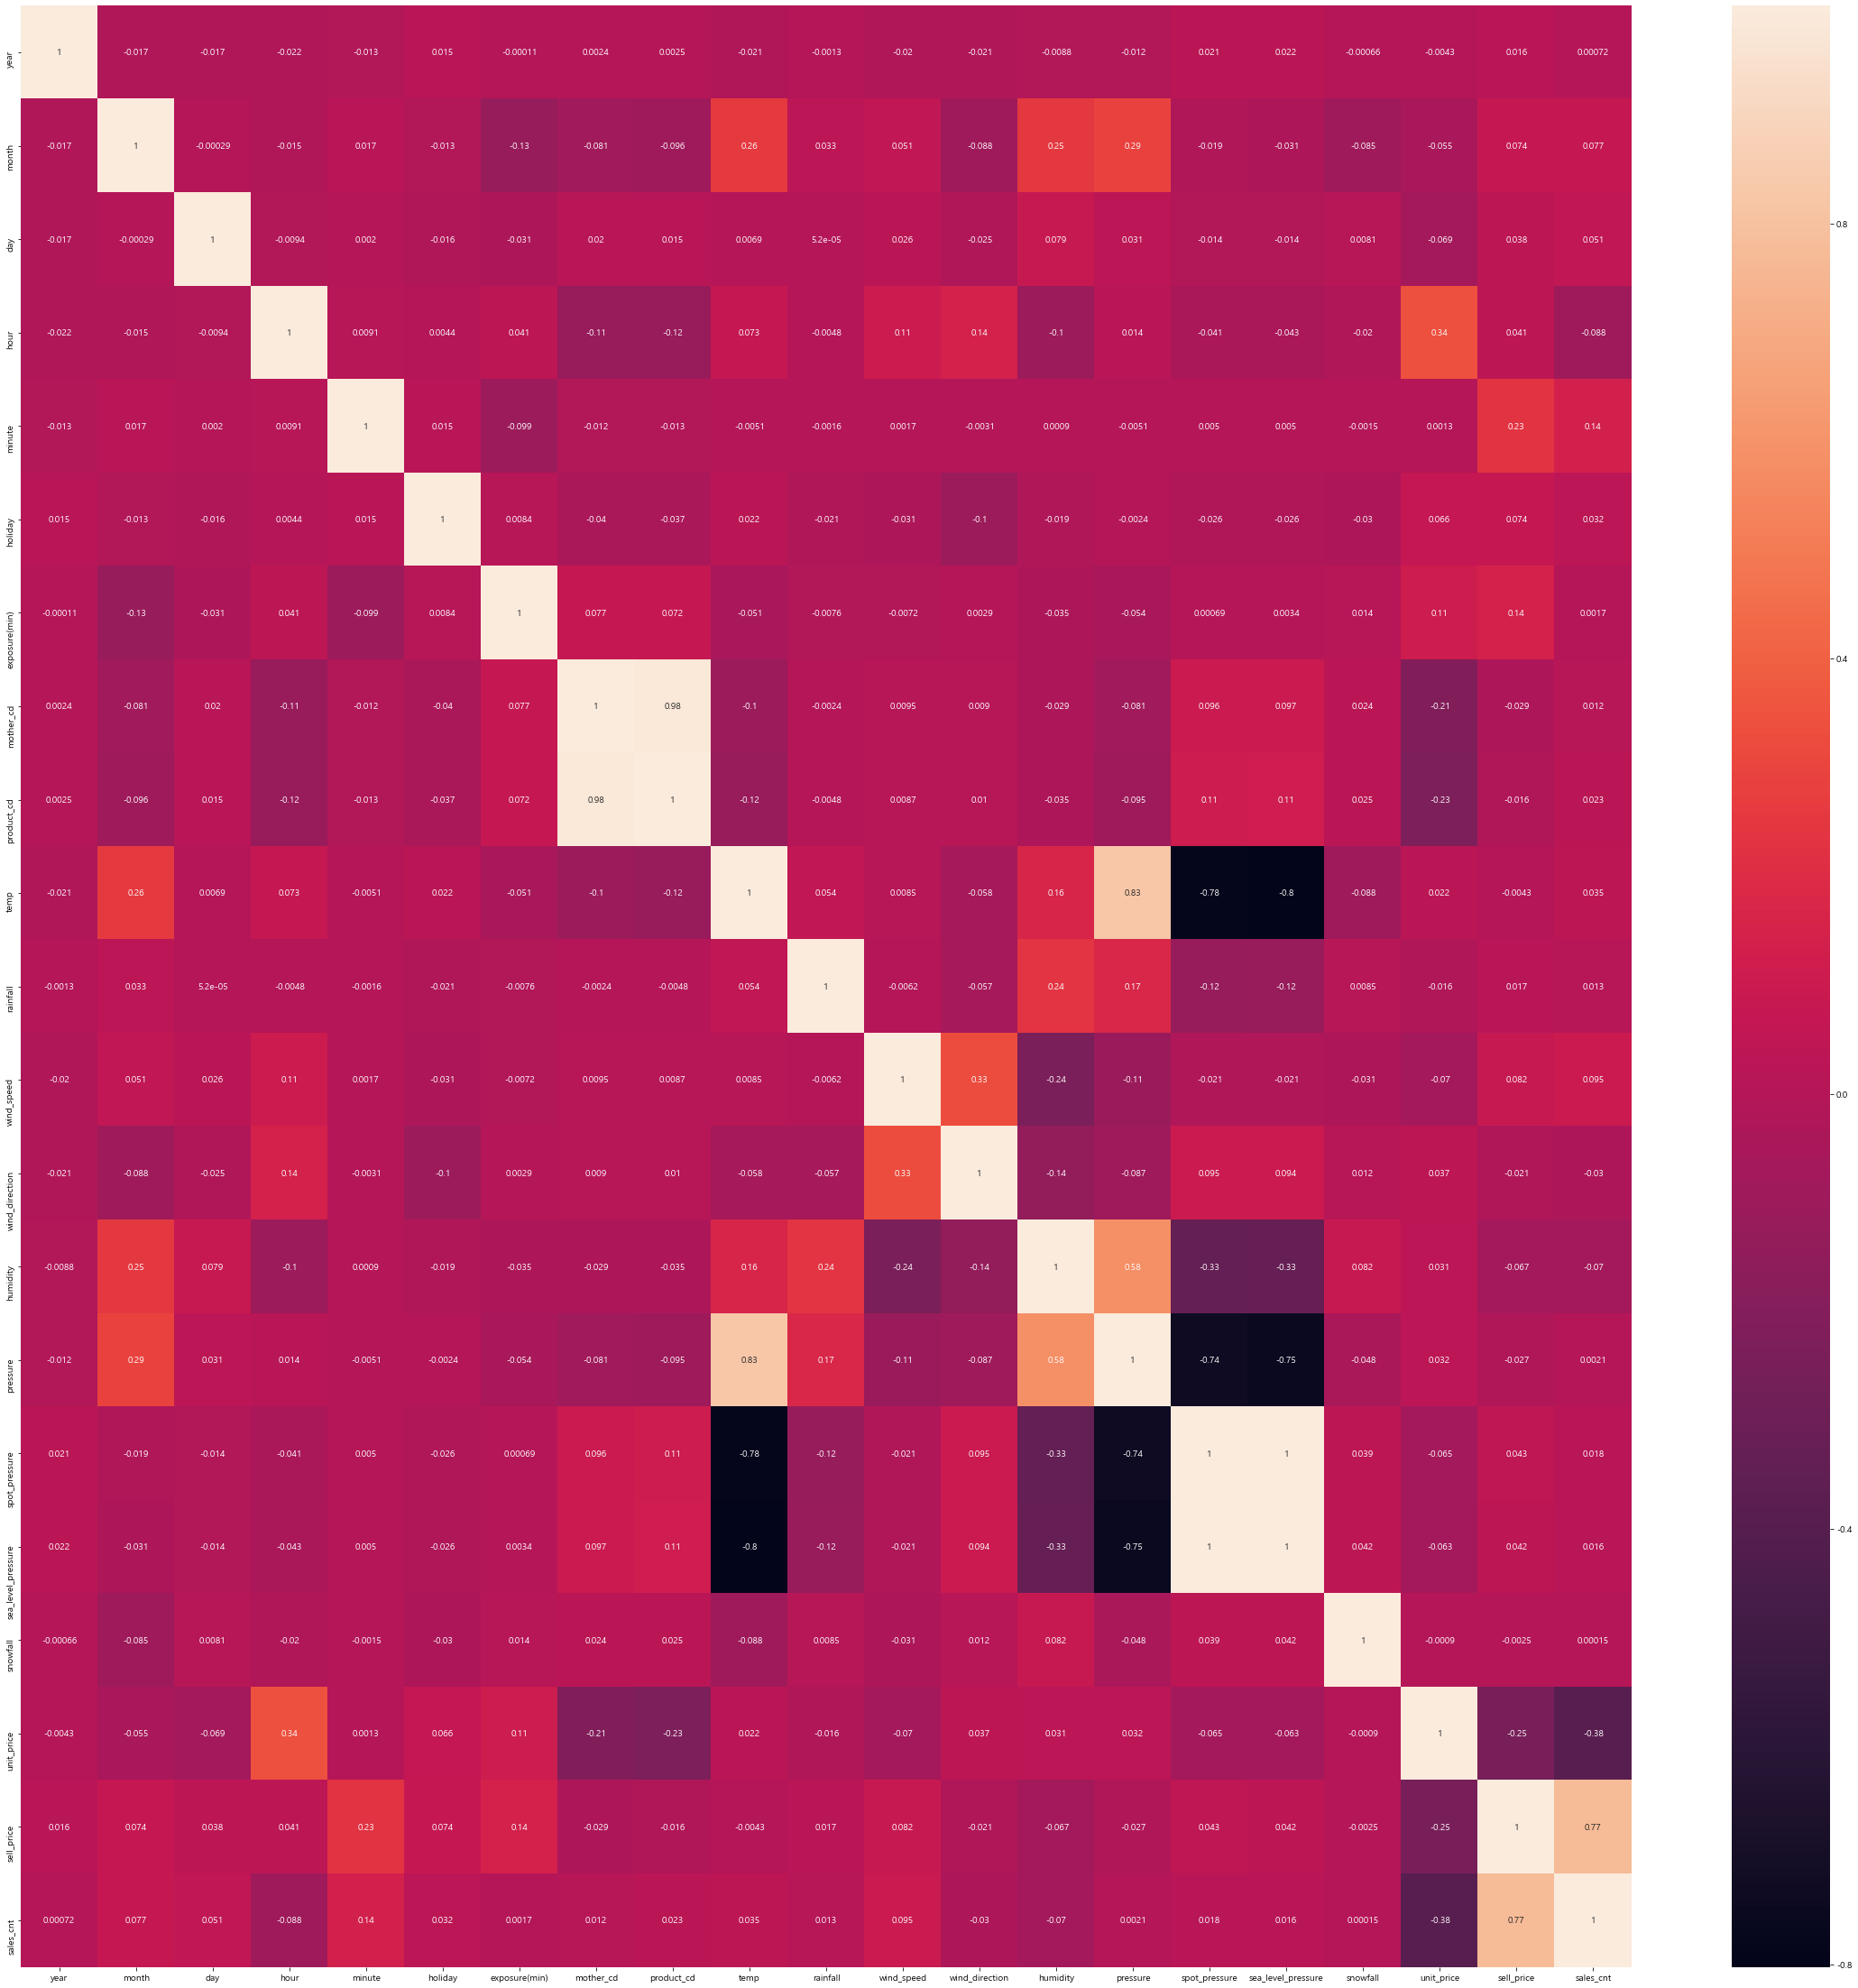

In [6]:
plt.figure(figsize=(40, 40))
ax = sns.heatmap(df_train.corr(), annot=True)

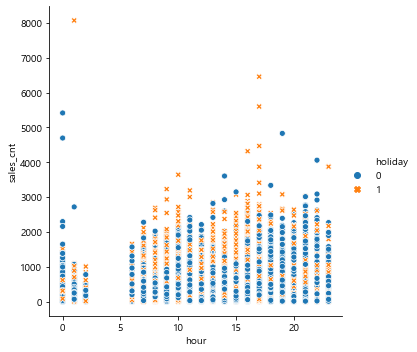

In [32]:
sns.relplot(x="hour", y="sales_cnt", hue="holiday", style="holiday",
            data=df_train)

In [ ]:
g = sns.catplot(x="hour", y="sales_cnt", row="holiday",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df_train)

In [75]:
main_col=df_train.columns[[2,3,4,5,6,7,8,12,13,14,15,16,17,18,19,20,21,22,23,24]]
main_col

Index(['month', 'day', 'hour', 'minute', 'weekday', 'holiday', 'exposure(min)',
       'product_grp', 'temp', 'rainfall', 'wind_speed', 'wind_direction',
       'humidity', 'pressure', 'spot_pressure', 'sea_level_pressure',
       'snowfall', 'unit_price', 'sell_price', 'sales_cnt'],
      dtype='object')

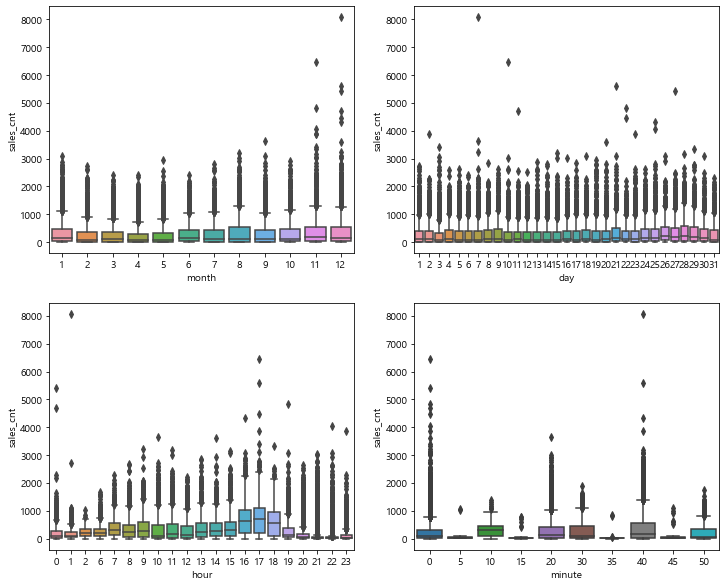

In [77]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=df_train,y="sales_cnt",x=main_col[0],ax=axes[0][0])
sns.boxplot(data=df_train,y="sales_cnt",x=main_col[1],ax=axes[0][1])
sns.boxplot(data=df_train,y="sales_cnt",x=main_col[2],ax=axes[1][0])
sns.boxplot(data=df_train,y="sales_cnt",x=main_col[3],ax=axes[1][1])

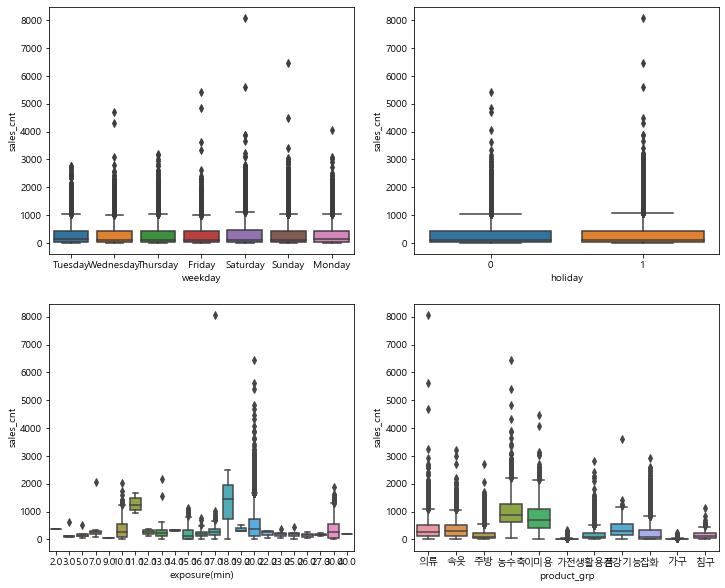

In [78]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=df_train,y="sales_cnt",x=main_col[4],ax=axes[0][0])
sns.boxplot(data=df_train,y="sales_cnt",x=main_col[5],ax=axes[0][1])
sns.boxplot(data=df_train,y="sales_cnt",x=main_col[6],ax=axes[1][0])
sns.boxplot(data=df_train,y="sales_cnt",x=main_col[7],ax=axes[1][1])

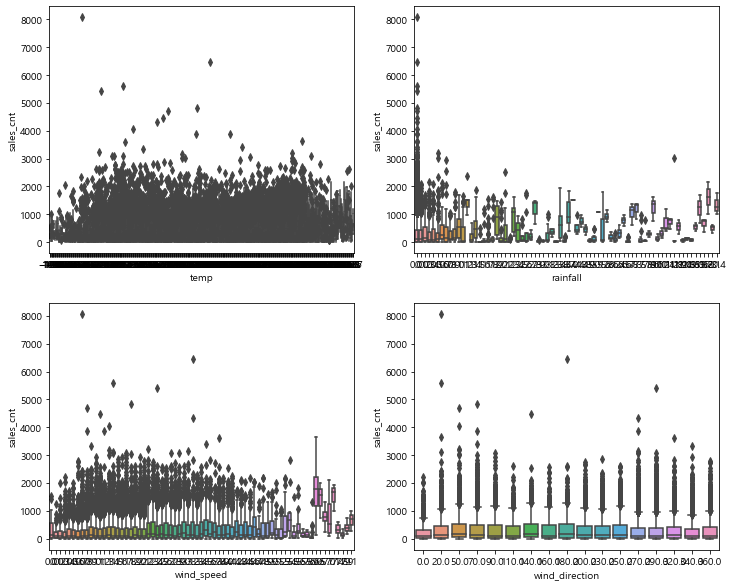

In [79]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=df_train,y="sales_cnt",x=main_col[8],ax=axes[0][0])
sns.boxplot(data=df_train,y="sales_cnt",x=main_col[9],ax=axes[0][1])
sns.boxplot(data=df_train,y="sales_cnt",x=main_col[10],ax=axes[1][0])
sns.boxplot(data=df_train,y="sales_cnt",x=main_col[11],ax=axes[1][1])

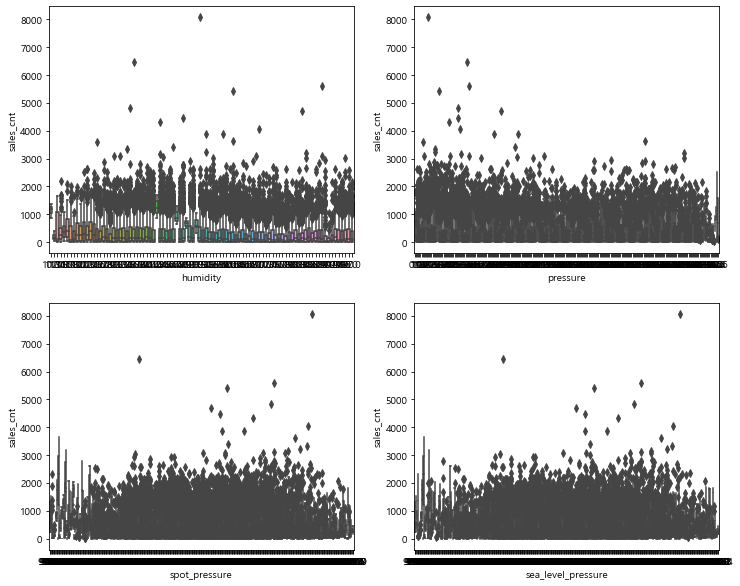

In [81]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=df_train,y="sales_cnt",x=main_col[12],ax=axes[0][0])
sns.boxplot(data=df_train,y="sales_cnt",x=main_col[13],ax=axes[0][1])
sns.boxplot(data=df_train,y="sales_cnt",x=main_col[14],ax=axes[1][0])
sns.boxplot(data=df_train,y="sales_cnt",x=main_col[15],ax=axes[1][1])

In [84]:
set(df_train.product_grp)

{'가구', '가전', '건강기능', '농수축', '생활용품', '속옷', '의류', '이미용', '잡화', '주방', '침구'}

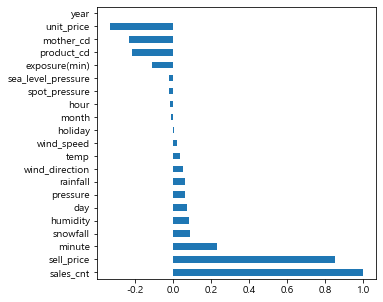

In [123]:
plt.figure(figsize=(5, 5))
df_train[df_train.product_grp=='가구'].corr().sales_cnt.sort_values(ascending=False).plot(kind='barh');

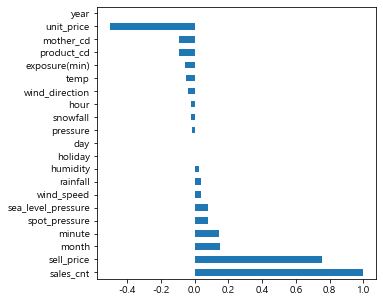

In [124]:
plt.figure(figsize=(5, 5))
df_train[df_train.product_grp=='가전'].corr().sales_cnt.sort_values(ascending=False).plot(kind='barh');

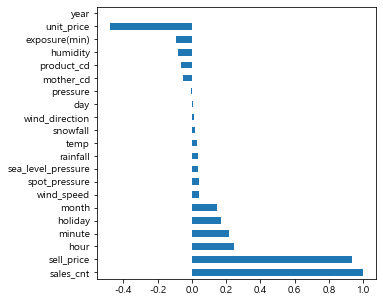

In [125]:
plt.figure(figsize=(5, 5))
df_train[df_train.product_grp=='건강기능'].corr().sales_cnt.sort_values(ascending=False).plot(kind='barh');

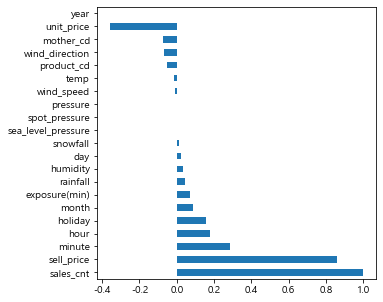

In [126]:
plt.figure(figsize=(5, 5))
df_train[df_train.product_grp=='농수축'].corr().sales_cnt.sort_values(ascending=False).plot(kind='barh');

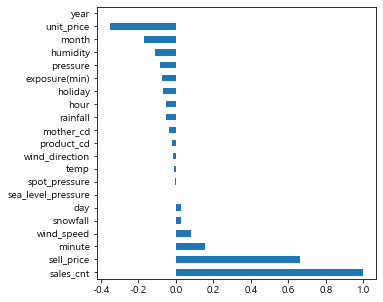

In [127]:
plt.figure(figsize=(5, 5))
df_train[df_train.product_grp=='생활용품'].corr().sales_cnt.sort_values(ascending=False).plot(kind='barh');

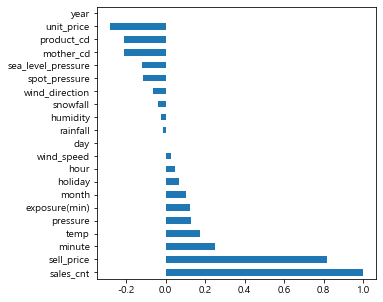

In [128]:
plt.figure(figsize=(5, 5))
df_train[df_train.product_grp=='속옷'].corr().sales_cnt.sort_values(ascending=False).plot(kind='barh');

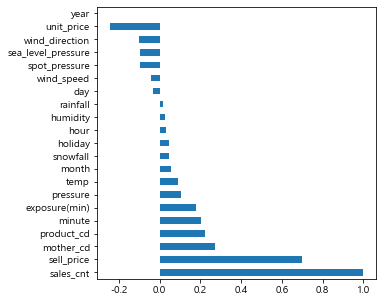

In [129]:
plt.figure(figsize=(5, 5))
df_train[df_train.product_grp=='의류'].corr().sales_cnt.sort_values(ascending=False).plot(kind='barh')

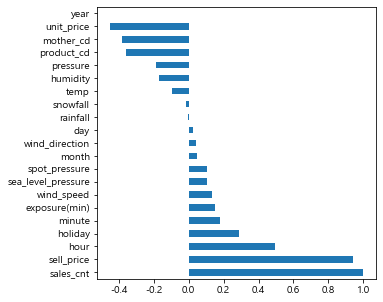

In [130]:
plt.figure(figsize=(5, 5))
df_train[df_train.product_grp=='이미용'].corr().sales_cnt.sort_values(ascending=False).plot(kind='barh')

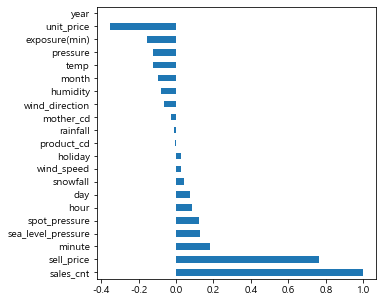

In [131]:
plt.figure(figsize=(5, 5))
df_train[df_train.product_grp=='잡화'].corr().sales_cnt.sort_values(ascending=False).plot(kind='barh')

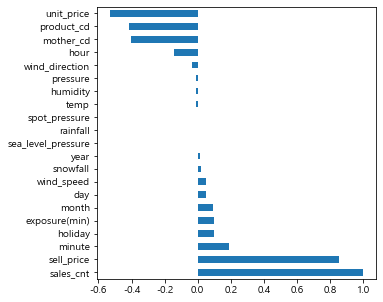

In [132]:
plt.figure(figsize=(5, 5))
df_train[df_train.product_grp=='주방'].corr().sales_cnt.sort_values(ascending=False).plot(kind='barh')

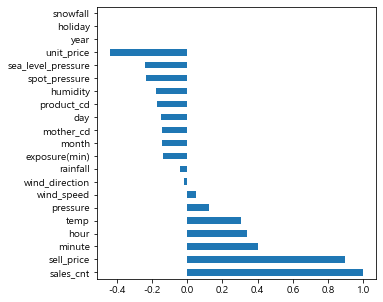

In [146]:
plt.figure(figsize=(5, 5))
df_train[df_train.product_grp=='침구'][df_train.holiday==0].corr().sales_cnt.sort_values(ascending=False).plot(kind='barh')

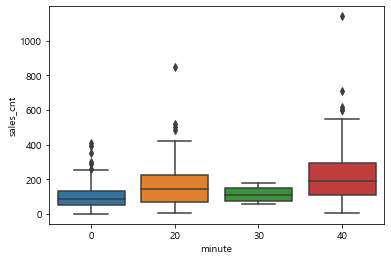

In [153]:
sns.boxplot(data=df_train[df_train.product_grp=='침구'],y="sales_cnt",x='minute')

In [151]:
df_train[df_train.product_grp=='주방'].year.value_counts()

2019    6600
2020       4
Name: year, dtype: int64